In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from DatasetBuilder import DatasetBuilder

In [7]:
# Number of samples
n_samples = 100

# Initialize the DatasetBuilder
builder = DatasetBuilder(n_samples=n_samples, random_seed=42)

# player_id,level,class,hours_played,win_loss_ratio,guild_membership,achievements_unlocked,overall_rank
# Add 'level' as a primary feature
builder.add_feature('level', lambda n: np.random.randint(20, 100, size=n), coefficient=0.3, noise_level=5)

# Add dependent features: 'hours_played' and 'win_loss_ratio' and 'achievements_unlocked'
# Add 'hours_played', which correlates with 'level' (e.g., 70% correlation with level)
builder.add_feature('hours_played', lambda n: np.random.randint(50, 1000, size=n), 
                    coefficient=0.2, depends_on='level', correlation_factor=0.95)
# Add 'win_loss_ratio', which correlates with 'level' (e.g., 50% correlation with level)
builder.add_feature('win_loss_ratio', lambda n: np.random.uniform(0.5, 2.0, size=n), 
                    coefficient=10, depends_on='level', correlation_factor=0.5)
# Add 'achievements_unlocked', which correlates with 'level' (e.g., 80% correlation with level)
builder.add_feature('achievements_unlocked', lambda n: np.random.randint(0, 100, size=n), 
                    coefficient=0.5, depends_on='level', correlation_factor=0.8)


# Add independent features: player_id, class, guild_membership
builder.add_feature('player_id', lambda n: np.arange(n), coefficient=0.1)
builder.add_feature('class', lambda n: np.random.choice(['warrior', 'mage', 'ranger'], size=n), 
                    coefficient=5, noise_level=2)
builder.add_feature('guild_membership', lambda n: np.random.choice([0, 1], size=n), 
                    coefficient=15, noise_level=5)

# Build the target variable
mmorpg_data = builder.build_target(target_name='overall_rank', bias=100, noise_std=50, target_range=(1, 1000))


In [8]:
mmorpg_data

,level,hours_played,win_loss_ratio,achievements_unlocked,player_id,class,guild_membership,overall_rank
0,71.0,79.95,35.914073,66.2,0.0,ranger,0.0,440.915562
1,34.0,76.75,17.668577,30.8,1.0,mage,1.0,285.404141
2,91.0,127.90,46.052877,73.4,2.0,warrior,0.0,577.114677
3,80.0,124.95,40.298669,70.8,3.0,mage,1.0,704.687950
4,40.0,42.10,20.440437,44.6,4.0,ranger,1.0,346.779135
...,...,...,...,...,...,...,...,...
95,52.0,63.55,26.512559,60.8,95.0,warrior,1.0,475.104071
96,24.0,59.45,12.733828,20.6,96.0,warrior,0.0,190.187143
97,60.0,92.65,30.751693,58.4,97.0,mage,1.0,459.903462
98,47.0,88.45,24.398126,49.4,98.0,ranger,0.0,478.955683


In [9]:
# Display the first few rows of the dataset
mmorpg_data.head()

,level,hours_played,win_loss_ratio,achievements_unlocked,player_id,class,guild_membership,overall_rank
0,71.0,79.95,35.914073,66.2,0.0,ranger,0.0,440.915562
1,34.0,76.75,17.668577,30.8,1.0,mage,1.0,285.404141
2,91.0,127.90,46.052877,73.4,2.0,warrior,0.0,577.114677
3,80.0,124.95,40.298669,70.8,3.0,mage,1.0,704.687950
4,40.0,42.10,20.440437,44.6,4.0,ranger,1.0,346.779135


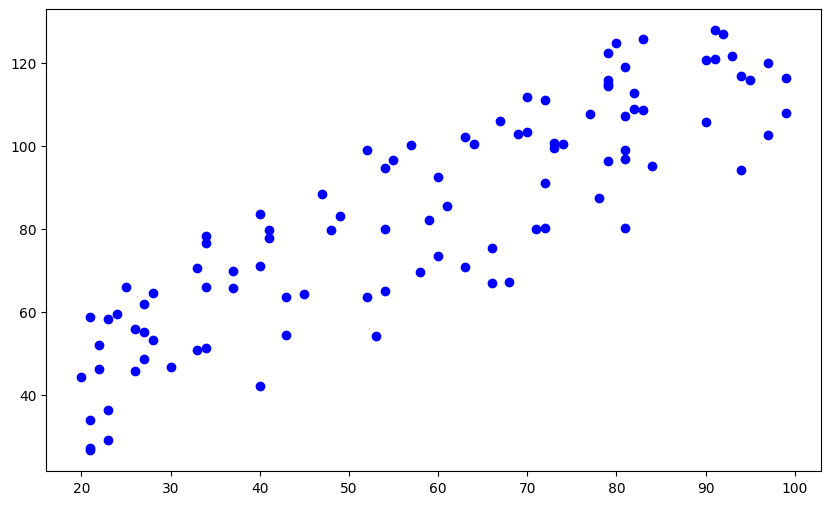

In [10]:
plt.figure(figsize=(10, 6))

# Scatter plot of hours_played vs overall_rank
plt.scatter(mmorpg_data['level'], mmorpg_data['hours_played'], color='blue', label='Hours Played')



In [11]:
# Save to CSV
csv_file_path = 'mmorpg_player_stats.csv'
mmorpg_data.to_csv(csv_file_path, index=False)

csv_file_path

'mmorpg_player_stats.csv'